In [1]:


import pandas as pd
import gdown

file_id = "1Xm3HWAnrHjLmvPTMVIMW4q624SBr_SCH"
url = f"https://drive.google.com/uc?id={file_id}"

output = "dataset.csv"  # Adjust the filename and extension if needed

gdown.download(url, output, quiet=False)
print(f"File downloaded as {output}")

Downloading...
From: https://drive.google.com/uc?id=1Xm3HWAnrHjLmvPTMVIMW4q624SBr_SCH
To: /content/dataset.csv
100%|██████████| 66.2M/66.2M [00:00<00:00, 128MB/s]

File downloaded as dataset.csv


In [2]:
import pandas as pd
data = pd.read_csv("dataset.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [4]:
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [5]:
print("Shape Of the Dataset is:",data.shape)

Shape Of the Dataset is: (50000, 2)


In [6]:
print("Number of Missing Values in the Dataset:\n",data.isnull().sum())

Number of Missing Values in the Dataset:
 review       0
sentiment    0
dtype: int64


In [7]:
print("Counting the Target Variable:\n",data.sentiment.value_counts())

Counting the Target Variable:
 sentiment
positive    25000
negative    25000
Name: count, dtype: int64


In [8]:
lowered_text = data.review.str.lower() #lowering the text
print(lowered_text)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production. <br /><br />the...
2        i thought this was a wonderful way to spend ti...
3        basically there's a family where a little boy ...
4        petter mattei's "love in the time of money" is...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot, bad dialogue, bad acting, idiotic di...
49997    i am a catholic taught in parochial elementary...
49998    i'm going to have to disagree with the previou...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object


In [9]:
punctuation_pattern = r'[^\w\s]'#Removing punctuation

# Apply re.sub to each element of the Series using .apply()
text_cleaned = lowered_text.apply(lambda x: re.sub(punctuation_pattern, '', x))
print(text_cleaned)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production br br the filmin...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object


In [10]:
removing_br=text_cleaned.apply(lambda x: re.sub(r"\bbr\b","",x,flags =re.IGNORECASE))
print(removing_br)

0        one of the other reviewers has mentioned that ...
1        a wonderful little production   the filming te...
2        i thought this was a wonderful way to spend ti...
3        basically theres a family where a little boy j...
4        petter matteis love in the time of money is a ...
                               ...                        
49995    i thought this movie did a down right good job...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    i am a catholic taught in parochial elementary...
49998    im going to have to disagree with the previous...
49999    no one expects the star trek movies to be high...
Name: review, Length: 50000, dtype: object


In [11]:
removing_space = removing_br.apply(lambda x: re.sub(r'\s+', ' ', x).strip())

In [12]:
word_token = removing_space.apply(lambda x: x.split()) #Tokenization
stop_words = set(stopwords.words('english'))#removing stopwords
filtered_sentence = []
for words_list in word_token:  # Iterate through each list of words in word_token
    filtered_words = [word for word in words_list if word not in stop_words] #check for each word in list
    filtered_sentence.append(' '.join(filtered_words)) #join the filtered words into a string and append the list


In [13]:
url_pattern = re.compile(r'https?://\S+|www\.\S+')#removing urls

# Convert the filtered_sentence list to a pandas Series
filtered_sentence_series = pd.Series(filtered_sentence)

# Now you can use apply on the Series
pre_processed_text = filtered_sentence_series.apply(lambda x: url_pattern.sub('', x))

print(pre_processed_text)

0        one reviewers mentioned watching 1 oz episode ...
1        wonderful little production filming technique ...
2        thought wonderful way spend time hot summer we...
3        basically theres family little boy jake thinks...
4        petter matteis love time money visually stunni...
                               ...                        
49995    thought movie right good job wasnt creative or...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    one expects star trek movies high art fans exp...
Length: 50000, dtype: object


In [14]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [15]:
from nltk.stem import WordNetLemmatizer
def lemmatization(data):
 lemma = WordNetLemmatizer()
 lemmatize_content = data.split()
 lemmatize_content = [lemma.lemmatize(word) for word in lemmatize_content ]
 lemmatize_content = ' '.join(lemmatize_content)
 return lemmatize_content

In [16]:
pre_processed_text.apply(lemmatization)

,0
0,one reviewer mentioned watching 1 oz episode y...
1,wonderful little production filming technique ...
2,thought wonderful way spend time hot summer we...
3,basically there family little boy jake think t...
4,petter matteis love time money visually stunni...
...,...
49995,thought movie right good job wasnt creative or...
49996,bad plot bad dialogue bad acting idiotic direc...
49997,catholic taught parochial elementary school nu...
49998,im going disagree previous comment side maltin...


In [17]:

import matplotlib.pyplot as plt
import seaborn as sns

<Axes: title={'center': 'review'}, xlabel='sentiment'>

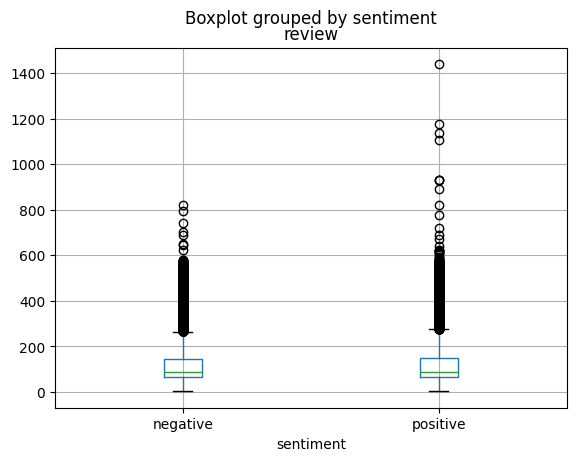

In [18]:

data['review'] = pre_processed_text.str.split().apply(len)
data.boxplot("review", by="sentiment")

In [19]:
from transformers import AutoTokenizer

In [20]:
model_ckpt = "distilbert-base-uncased"  #ENGLISH english
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "We love to sleep! Winters are awesome!"
encoded_text = tokenizer(text)
print(encoded_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

{'input_ids': [101, 2057, 2293, 2000, 3637, 999, 12214, 2024, 12476, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


In [21]:
from sklearn.model_selection import train_test_split

# 1. Create a new DataFrame with pre-processed text and sentiment
combined_data = pd.DataFrame({'pre_processed_text': pre_processed_text, 'sentiment': data['sentiment']})

# 2. Split the combined data
train, test = train_test_split(combined_data, test_size=0.3, stratify=combined_data['sentiment'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['sentiment'])



train.shape, test.shape, validation.shape

((35000, 2), (10000, 2), (5000, 2))

In [23]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 15.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [24]:

from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    "train": Dataset.from_pandas(train, preserve_index=False),
    "test": Dataset.from_pandas(test, preserve_index=False),
    "validation": Dataset.from_pandas(validation, preserve_index=False)
})

In [25]:
dataset

DatasetDict({
    train: Dataset({
        features: ['pre_processed_text', 'sentiment'],
        num_rows: 35000
    })
    test: Dataset({
        features: ['pre_processed_text', 'sentiment'],
        num_rows: 10000
    })
    validation: Dataset({
        features: ['pre_processed_text', 'sentiment'],
        num_rows: 5000
    })
})

Tokenization of emotion/sentiment data

In [26]:
combined_data['pre_processed_text'][0]

'one reviewers mentioned watching 1 oz episode youll hooked right exactly happened mebr first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use wordbr called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home manyaryans muslims gangstas latinos christians italians irish moreso scuffles death stares dodgy dealings shady agreements never far awaybr would say main appeal show due fact goes shows wouldnt dare forget pretty pictures painted mainstream audiences forget charm forget romanceoz doesnt mess around first episode ever saw struck nasty surreal couldnt say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards wholl sold nickel inmates wholl kill order get away well mannered middle 

In [27]:
label2id = {label: i for i, label in enumerate(dataset['train'].unique('sentiment'))}
id2label = {i: label for label, i in label2id.items()}
label2id, id2label

({'negative': 0, 'positive': 1}, {0: 'negative', 1: 'positive'})

In [28]:
def tokenize(batch):
    tokenized = tokenizer(batch['pre_processed_text'], padding=True, truncation=True, return_token_type_ids=True)
    tokenized['labels'] = [label2id[label] for label in batch['sentiment']]  # Convert sentiment to label IDs
    return tokenized

print(tokenize(dataset['train'][:2]))

{'input_ids': [[101, 12817, 16524, 2964, 1048, 2860, 11039, 15185, 2573, 2659, 24170, 5469, 2350, 3582, 6279, 4861, 2434, 13109, 28819, 2545, 28616, 6906, 6321, 19892, 2477, 4088, 5399, 10015, 10093, 12879, 4014, 5244, 3098, 6495, 2156, 2963, 2195, 5875, 7171, 4165, 3336, 2015, 2304, 13675, 12322, 2058, 18003, 2075, 20037, 2892, 3829, 5442, 18040, 3344, 14542, 19510, 4570, 4545, 3333, 5213, 21183, 6132, 4014, 3491, 13423, 23165, 2723, 23397, 20839, 3877, 2302, 14665, 7390, 2376, 24302, 2657, 3025, 3152, 13764, 8649, 5875, 10957, 8288, 5690, 12960, 2775, 17257, 6763, 25946, 2036, 2304, 2466, 4152, 5291, 2196, 2428, 9372, 6433, 18040, 7923, 4062, 3238, 3902, 1059, 24158, 8126, 2185, 2643, 2243, 19779, 26760, 5886, 2063, 17798, 3804, 3532, 6110, 8764, 2521, 10524, 4097, 4971, 5685, 11958, 8227, 8772, 17219, 13275, 2775, 7918, 5685, 15603, 2132, 2471, 14117, 3459, 7920, 5146, 16360, 6935, 2075, 26188, 2535, 19892, 2348, 2561, 4945, 8297, 11253, 21748, 3215, 2207, 2338, 2433, 2034, 2672, 20

In [29]:
emotion_encoded=dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/35000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10000 [00:00<?, ? examples/s]

Map:   0%|          | 0/5000 [00:00<?, ? examples/s]

In [31]:
from transformers import AutoModel
import torch


In [32]:

model= AutoModel.from_pretrained(model_ckpt)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [33]:

model

DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): DistilBertSdpaAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): L

In [34]:
model.config
model_two="bert-base-cased"

In [35]:
from transformers import AutoModelForSequenceClassification, AutoConfig
Num_labels = len(label2id)
device = torch.device ("cuda" if torch. cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained(model_ckpt, label2id=label2id, id2label=id2label)
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt, config=config).to(device)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [36]:
device

device(type='cuda')

In [37]:
from transformers import TrainingArguments

In [43]:


batch_size=16 # Reduced batch size to 32
training_dir = "bert_base_training_dir"
training_args= TrainingArguments(output_dir = training_dir,
              overwrite_output_dir = True,
              num_train_epochs = 2,
              learning_rate = 2e-5,
              per_device_train_batch_size = batch_size,
              per_device_eval_batch_size = batch_size,
              weight_decay = 0.01,
              evaluation_strategy = 'epoch',
              disable_tqdm = False,
              #gradient_accumulation_steps=2, # Added gradient accumulation
              #gradient_checkpointing=True, # Added gradient checkpointing
              #fp16=True, #Enable mixed precision training (if your GPU supports it)
              #deepspeed="ds_config.json" # Enable deepspeed (refer to deepspeed documentation)
    )

import torch
# Clear GPU cache
torch.cuda.empty_cache()

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [44]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics (pred) :
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "f1": f1}

In [45]:
from transformers import Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=emotion_encoded['train'],
    eval_dataset=emotion_encoded['validation'],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

<ipython-input-45-f7f22c6f6a80>:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [46]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.247700,0.244100,0.904600,0.904293
2,0.178400,0.239401,0.921400,0.921400


TrainOutput(global_step=4376, training_loss=0.23470719945932, metrics={'train_runtime': 3710.1239, 'train_samples_per_second': 18.867, 'train_steps_per_second': 1.179, 'total_flos': 9272717905920000.0, 'train_loss': 0.23470719945932, 'epoch': 2.0})

In [47]:
save_directory = "./sentiment_transformer_model"
trainer.model.save_pretrained(save_directory)
trainer.tokenizer.save_pretrained(save_directory)

print(f"Model and tokenizer saved to {save_directory}")


Trainer.tokenizer is now deprecated. You should use Trainer.processing_class instead.


Model and tokenizer saved to ./sentiment_transformer_model


In [52]:
import shutil

# Define the directory and the zip file name
save_directory = "./sentiment_transformer_model"
zip_file_name = "sentiment_transformer_model.zip"

# Compress the directory into a zip file
shutil.make_archive("sentiment_transformer_model", 'zip', save_directory)

print(f"Model directory compressed into: {zip_file_name}")


Model directory compressed into: sentiment_transformer_model.zip


In [48]:
preds_output = trainer.predict(emotion_encoded[ 'test'])
preds_output.metrics

{'test_loss': 0.27305132150650024,
 'test_accuracy': 0.9129,
 'test_f1': 0.9128997482802726,
 'test_runtime': 161.5892,
 'test_samples_per_second': 61.885,
 'test_steps_per_second': 3.868}

In [49]:
preds_output.predictions

array([[-2.580217  ,  2.732894  ],
       [-2.7745707 ,  2.9138112 ],
       [-2.2988105 ,  2.4916215 ],
       ...,
       [-2.457834  ,  2.5935433 ],
       [ 2.4921725 , -2.501951  ],
       [-0.68878466,  0.90119475]], dtype=float32)

In [51]:
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = emotion_encoded['test'][:]['sentiment']

In [54]:
from sklearn.metrics import classification_report
y_pred = np.argmax(preds_output.predictions, axis=1)
# Convert y_true to numeric labels using label2id
y_true_numeric = [label2id[label] for label in emotion_encoded['test'][:]['sentiment']]

# Now use y_true_numeric in the classification_report
print(classification_report(y_true_numeric, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      5000
           1       0.91      0.91      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
label2id

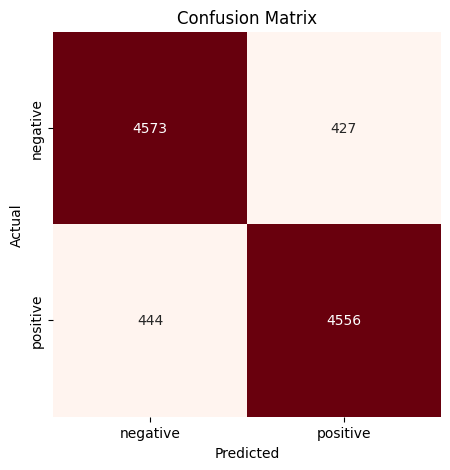

In [57]:
from sklearn.metrics import confusion_matrix # Import the confusion_matrix function

cm = confusion_matrix(y_true_numeric, y_pred)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, xticklabels=label2id.keys(), yticklabels=label2id.keys(), fmt ='d', cbar=False, cmap='Reds')
plt.ylabel("Actual") # Corrected typo: 'yabel' to 'ylabel'
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.show()

In [58]:

text = "I am super happy today. I got it done. Finally!!"
def get_prediction (text) :
    input_encoded = tokenizer(text, return_tensors='pt').to(device)
    with torch.no_grad():
      outputs = model(**input_encoded)
    logits = outputs. logits
    pred = torch.argmax(logits, dim=1) .item()
    return id2label[pred]
get_prediction (text)


'positive'

In [59]:
trainer.save_model("distilbert-base-uncased-sentiment-model")

In [62]:
import shutil

# Define the directory and the zip file name
save_directory = "./distilbert-base-uncased-sentiment-model"
zip_file_name = "sentiment_transformer_model.zip"

# Compress the directory into a zip file
shutil.make_archive("sentiment_transformer_model", 'zip', save_directory)

print(f"Model directory compressed into: {zip_file_name}")


Model directory compressed into: sentiment_transformer_model.zip


In [61]:
from transformers import pipeline
classifier = pipeline('text-classification', model= 'distilbert-base-uncased-sentiment-model')
classifier([text, 'A very good day indeed', "We loved mth111", "I am feeling anxious"])

Device set to use cuda:0


[{'label': 'positive', 'score': 0.9214980602264404},
 {'label': 'positive', 'score': 0.873665988445282},
 {'label': 'positive', 'score': 0.9362974166870117},
 {'label': 'negative', 'score': 0.5239090919494629}]

In [66]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 7.2 MB/s eta 0:00:00


In [74]:
import streamlit as st
from transformers import pipeline

# App Title
st.title("Fine-Tuned Sentiment Classifier")

# Load the sentiment classification pipeline
classifier = pipeline('text-classification', model='./sentiment_transformer_model')  # Ensure path/model name is correct

# User Input
text = st.text_area("Enter Your Text Here")

# Predict Button
if st.button("Predict"):
    if text.strip():
        result = classifier(text)
        sentiment = result[0]['label']  # Extracting sentiment label
        confidence = result[0]['score']  # Extracting confidence score
        st.write(f"**Prediction:** {sentiment}")
        st.write(f"**Confidence:** {confidence:.2f}")
    else:
        st.write("⚠️ Please enter some text.")


2025-01-19 19:35:26.009 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-19 19:35:26.016 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
Device set to use cuda:0
2025-01-19 19:35:26.229 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-19 19:35:26.231 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-19 19:35:26.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-19 19:35:26.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-19 19:35:26.237 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-19 19:35:26.239 Thread 'MainThread': missing ScriptRunContext! This warning can be ig

In [77]:
import streamlit as st
st.title("Streamlit Test App")
st.write("Hello, world!")


2025-01-19 19:38:46.895 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-19 19:38:46.899 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-19 19:38:46.900 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-19 19:38:46.903 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-19 19:38:46.904 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-19 19:38:46.906 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


In [79]:
!pip install streamlit

In [81]:
!streamlit hello




  Welcome to Streamlit. Check out our demo in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.75.133.215:8501

  Ready to create your own Python apps super quickly?
  Head over to https://docs.streamlit.io

  May you create awesome apps!


  Stopping...
  Stopping...
